In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/sanjay/Downloads/bike-sharing-demand/train.csv')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday 

In [9]:
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >=5 else 0)

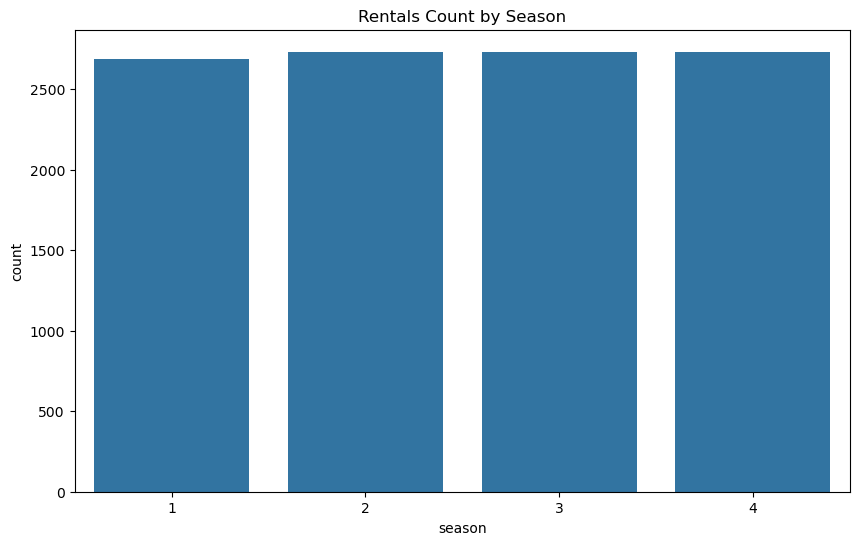

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='season')
plt.title('Rentals Count by Season')
plt.show()

In [11]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

In [12]:
print(df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'weekday', 'is_weekend', 'hour'],
      dtype='object')


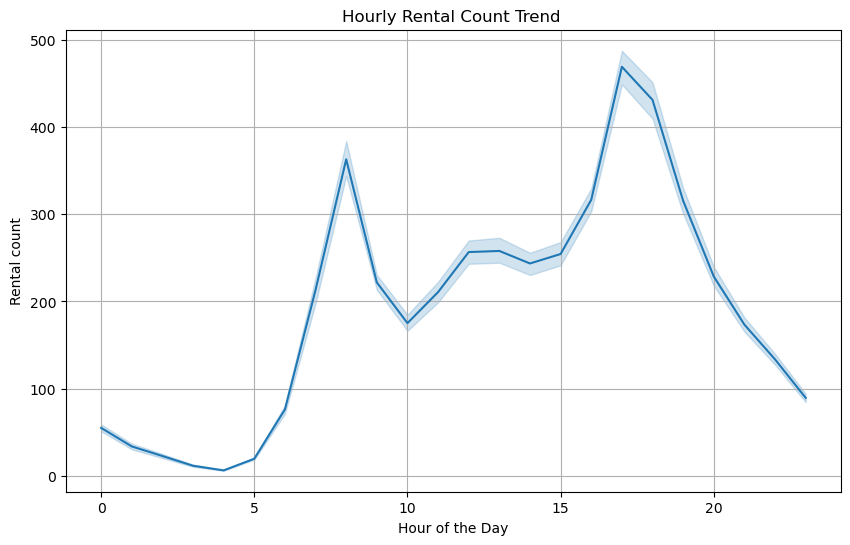

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='hour', y='count')
plt.title("Hourly Rental Count Trend ")
plt.xlabel("Hour of the Day")
plt.ylabel("Rental count")
plt.grid(True)
plt.show()

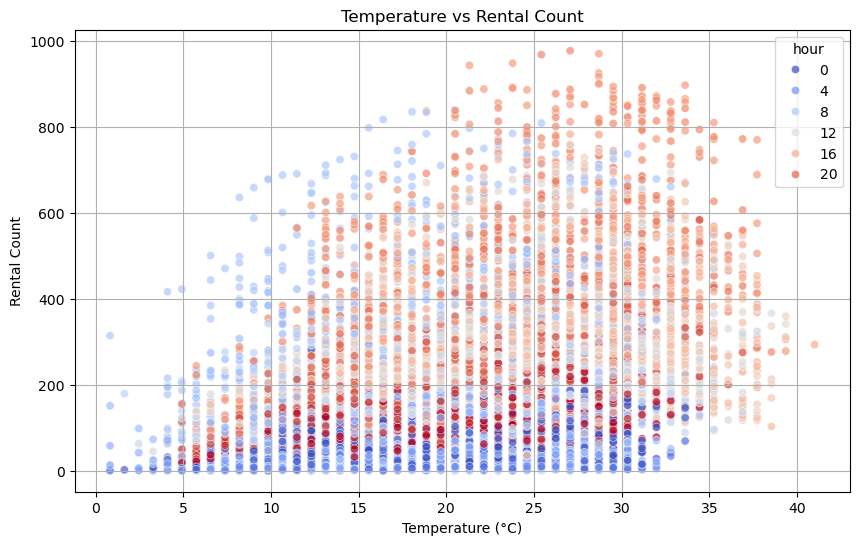

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='temp', y='count', hue='hour', palette='coolwarm', alpha=0.7)
plt.title("Temperature vs Rental Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rental Count")
plt.grid(True)
plt.show()

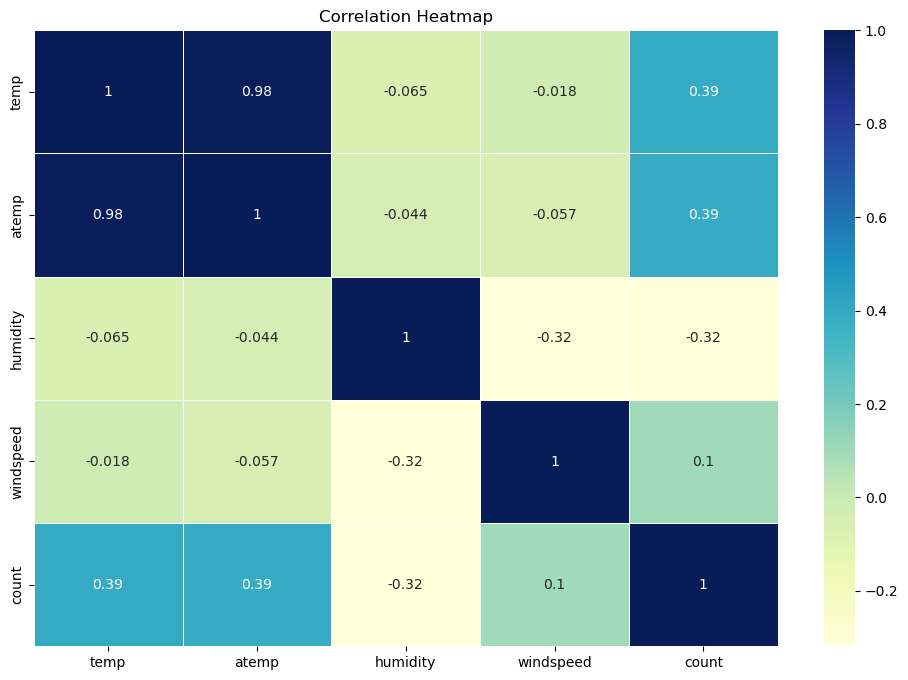

In [15]:
plt.figure(figsize=(12,8))
corr_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df.drop('atemp',axis=1, inplace=True)

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['dayofweek'] = df['datetime'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if x in [7,8,17,18] else 0)

In [18]:
df.isnull().sum()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
humidity        0
windspeed       0
casual          0
registered      0
count           0
year            0
month           0
day             0
weekday         0
is_weekend      0
hour            0
dayofweek       0
is_peak_hour    0
dtype: int64

In [19]:
df = pd.get_dummies(df, columns=['season','weather'],drop_first=True)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['temp', 'humidity', 'windspeed']])

df[['temp', 'humidity', 'windspeed']] = scaled_features

In [21]:

y = df['count']
X = df.drop(['count'], axis=1)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

In [30]:
print(y.head())
print(y.shape)
print(type(y))

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64
(10886,)
<class 'pandas.core.series.Series'>


In [31]:
y = df['count'].values.ravel()

In [33]:
X = X.drop(columns=['datetime'], errors='ignore')

In [34]:
X['hour'] = df['datetime'].dt.hour
X['day'] = df['datetime'].dt.day
X['month'] = df['datetime'].dt.month
X['year'] = df['datetime'].dt.year
X = X.drop(columns=['datetime'], errors='ignore')

In [35]:
# Drop target column and datetime
X = df.drop(columns=['count', 'datetime'], errors='ignore')
y = df['count']


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [39]:
print(X.dtypes)

holiday           int64
workingday        int64
temp            float64
humidity        float64
windspeed       float64
casual            int64
registered        int64
year              int32
month             int32
day               int32
weekday           int32
is_weekend        int64
hour              int32
dayofweek         int32
is_peak_hour      int64
season_2           bool
season_3           bool
season_4           bool
weather_2          bool
weather_3          bool
weather_4          bool
dtype: object


In [40]:
X['hour'] = df['datetime'].dt.hour
X['day'] = df['datetime'].dt.day
X['month'] = df['datetime'].dt.month
X['year'] = df['datetime'].dt.year
X = X.drop(columns=['datetime'], errors='ignore')

In [41]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
print(X.select_dtypes(include='object').columns)

Index([], dtype='object')


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 10.601782690541778
R2 Score: 0.9996788013666614


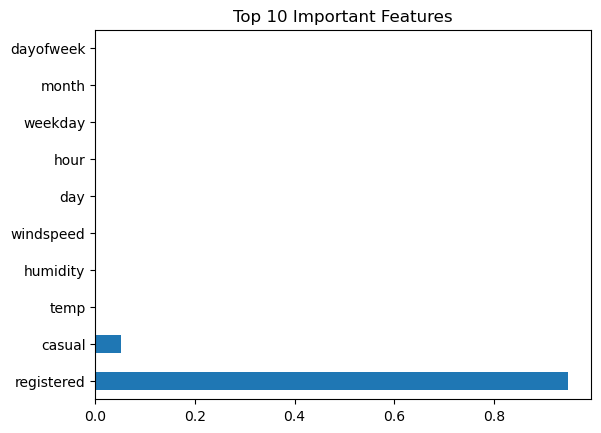

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

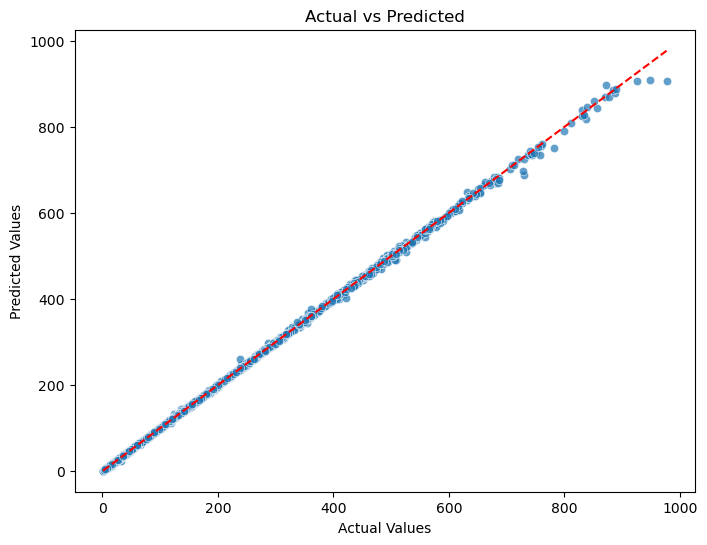

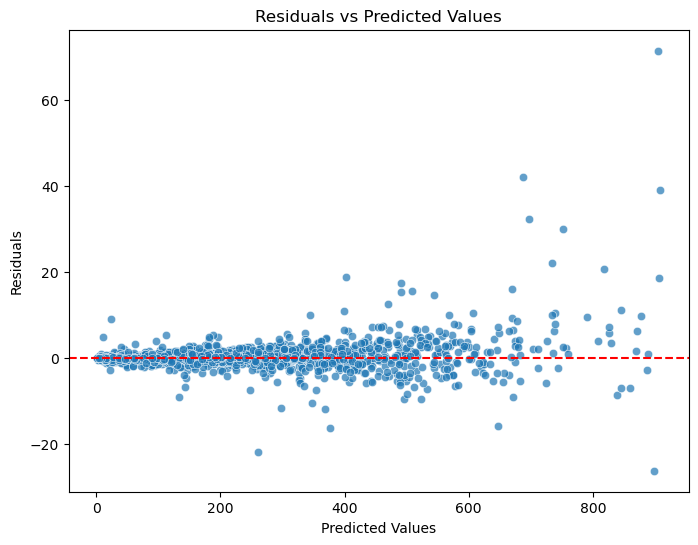

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()